# AI TRAFFIC SIGNS RECOGNITION

## Importing the libraries

In [1]:
import numpy as np
import os
import matplotlib.pyplot as plt
import tensorflow as tf
import cv2
from tensorflow import keras
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
np.random.seed(42)

from matplotlib import style
style.use('fivethirtyeight')

In [2]:
data_dir = 'gtsrb'

# Resizing the images to 30x30x3
IMG_HEIGHT = 30
IMG_WIDTH = 30
channels = 3

In [3]:
NUM_CATEGORIES = len(os.listdir(data_dir))
NUM_CATEGORIES

43

In [4]:
# Label Overview
classes = { 0:'Speed limit (20km/h)',
            1:'Speed limit (30km/h)', 
            2:'Speed limit (50km/h)', 
            3:'Speed limit (60km/h)', 
            4:'Speed limit (70km/h)', 
            5:'Speed limit (80km/h)', 
            6:'End of speed limit (80km/h)', 
            7:'Speed limit (100km/h)', 
            8:'Speed limit (120km/h)', 
            9:'No passing', 
            10:'No passing veh over 3.5 tons', 
            11:'Right-of-way at intersection', 
            12:'Priority road', 
            13:'Yield', 
            14:'Stop', 
            15:'No vehicles', 
            16:'Veh > 3.5 tons prohibited', 
            17:'No entry', 
            18:'General caution', 
            19:'Dangerous curve left', 
            20:'Dangerous curve right', 
            21:'Double curve', 
            22:'Bumpy road', 
            23:'Slippery road', 
            24:'Road narrows on the right', 
            25:'Road work', 
            26:'Traffic signals', 
            27:'Pedestrians', 
            28:'Children crossing', 
            29:'Bicycles crossing', 
            30:'Beware of ice/snow',
            31:'Wild animals crossing', 
            32:'End speed + passing limits', 
            33:'Turn right ahead', 
            34:'Turn left ahead', 
            35:'Ahead only', 
            36:'Go straight or right', 
            37:'Go straight or left', 
            38:'Keep right', 
            39:'Keep left', 
            40:'Roundabout mandatory', 
            41:'End of no passing', 
            42:'End no passing veh > 3.5 tons' }

## Finding Total Classes and Visualization for it

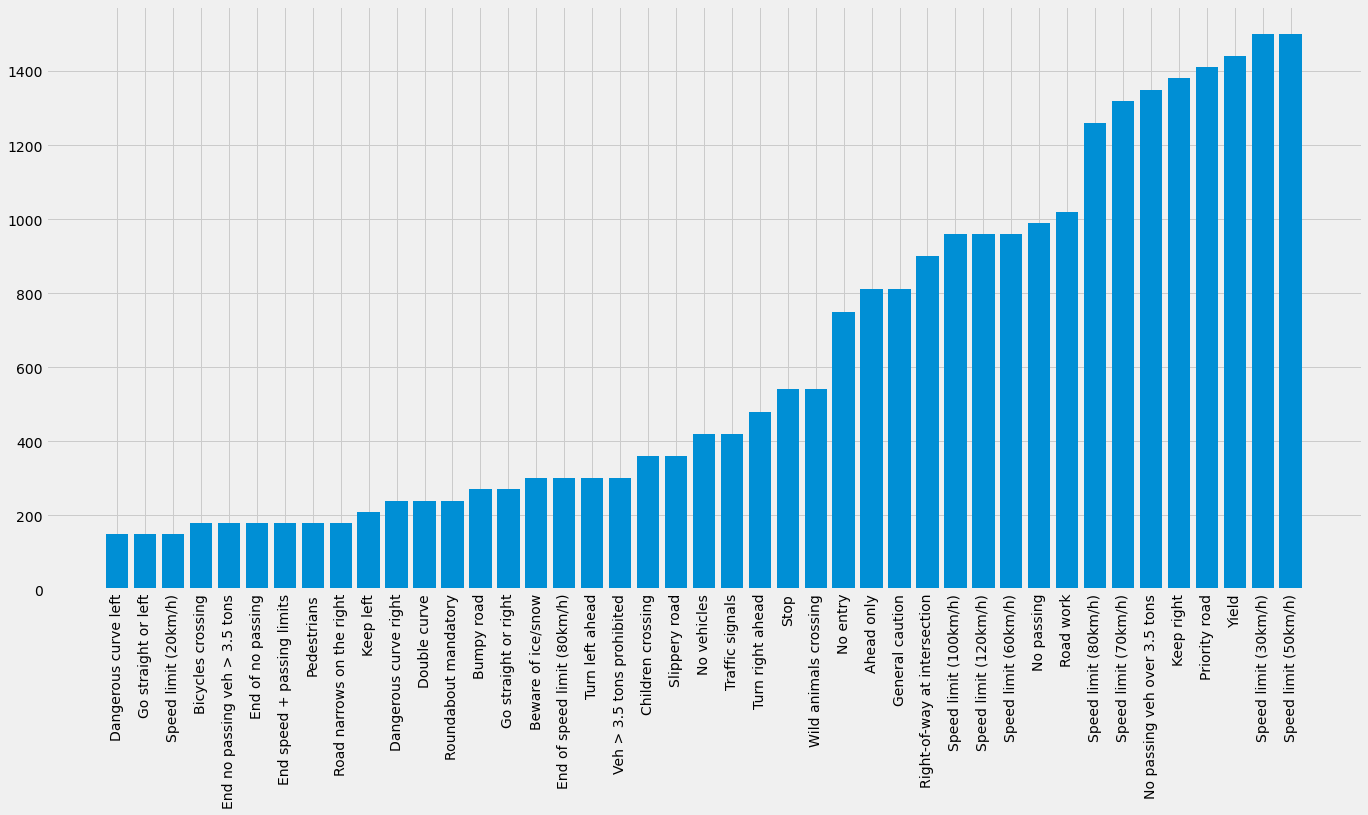

In [5]:
folders = os.listdir(data_dir)

data_number = []
class_num = []

for folder in folders:
    data_files = os.listdir(data_dir + '/' + folder)
    data_number.append(len(data_files))
    class_num.append(classes[int(folder)])
    
# Sorting the dataset on the basis of number of images in each class
zipped_lists = zip(data_number, class_num)
sorted_pairs = sorted(zipped_lists)
tuples = zip(*sorted_pairs)
data_number, class_num = [ list(tuple) for tuple in  tuples]

# Plotting the number of images in each class
plt.figure(figsize=(21,10))  
plt.bar(class_num, data_number)
plt.xticks(class_num, rotation='vertical')
plt.show()

## Loading the dataset and resize the images

In [6]:
data = []
labels = []
# Retrieving the images and their labels
for i in range(NUM_CATEGORIES):
    path = os.path.join(data_dir, str(i))
    images = os.listdir(path)

    for a in images:
        try:
            image = cv2.imread(path + '\\' + a)
            image = cv2.resize(image, (IMG_WIDTH, IMG_HEIGHT), 3)
            image = np.array(image)
            data.append(image)
            labels.append(i)
        except:
            print("Error loading image")
# Converting lists into numpy arrays
images = np.array(data)
labels = np.array(labels)

In [7]:
print(images.shape)

(26640, 30, 30, 3)


## Splitting data 

After reshaping the arrays, it’s time to split them into training and testing data and the test and validate size will be 30% from whole data.

In [8]:
TEST_SIZE = 0.1
Train_SIZE = 0.7
Validate_SIZE = 0.2
labels = tf.keras.utils.to_categorical(labels)
x_train, x_test, y_train, y_test = train_test_split(
        np.array(images), np.array(labels), train_size=Train_SIZE+Validate_SIZE, test_size=TEST_SIZE, random_state=42
    )

We want to standardize our dataset.

In [9]:
X_trainn = x_train/255 
x_testt = x_test/255

print("X_train.shape", X_trainn.shape)
print("X_test.shape", x_testt.shape)
print("y_train.shape", y_train.shape)
print("y_test.shape", y_test.shape)

X_train.shape (23975, 30, 30, 3)
X_test.shape (2664, 30, 30, 3)
y_train.shape (23975, 43)
y_test.shape (2664, 43)


## Building the model

Here the CNN model's structure is defined. Regarding the loss function the categorical crossentropy is used, and the ADAM is selection for the network optimization.

As we have 70% training of images in the dataset, we are setting EPOCHS as 10. The model contains two Conv2D layers followed by one MaxPooling2D layer. This is done two times for the effective extraction of features, which is followed by the Dense layers. A dropout layer of 0.5 is added to avoid overfitting the data.

In [10]:
def get_model(X_train):
    """
    Returns a compiled convolutional neural network model. Assume that the
    `input_shape` of the first layer is `(IMG_WIDTH, IMG_HEIGHT, 3)`.
    The output layer should have `NUM_CATEGORIES` units, one for each category.
    """
    # Building the model
    model = Sequential()
    model.add(Conv2D(filters=32, kernel_size=(5, 5), activation='relu', input_shape=X_train.shape[1:]))
    model.add(Conv2D(filters=32, kernel_size=(5, 5), activation='relu'))
    model.add(MaxPool2D(pool_size=(2, 2)))
    model.add(Dropout(rate=0.25))
    model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
    model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
    model.add(MaxPool2D(pool_size=(2, 2)))
    model.add(Dropout(rate=0.25))
    model.add(Flatten())
    model.add(Dense(256, activation='relu'))
    model.add(Dropout(rate=0.5))
    model.add(Dense(43, activation='softmax'))

    # Compilation of the model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

    return  model

### compiled neural network 

In [11]:
# Get a compiled neural network
model = get_model(x_train)

### Model Summary and plot the model

In [12]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        2432      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 22, 22, 32)        25632     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 11, 11, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 11, 11, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 9, 9, 64)          18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 7, 7, 64)          36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 3, 3, 64)          0

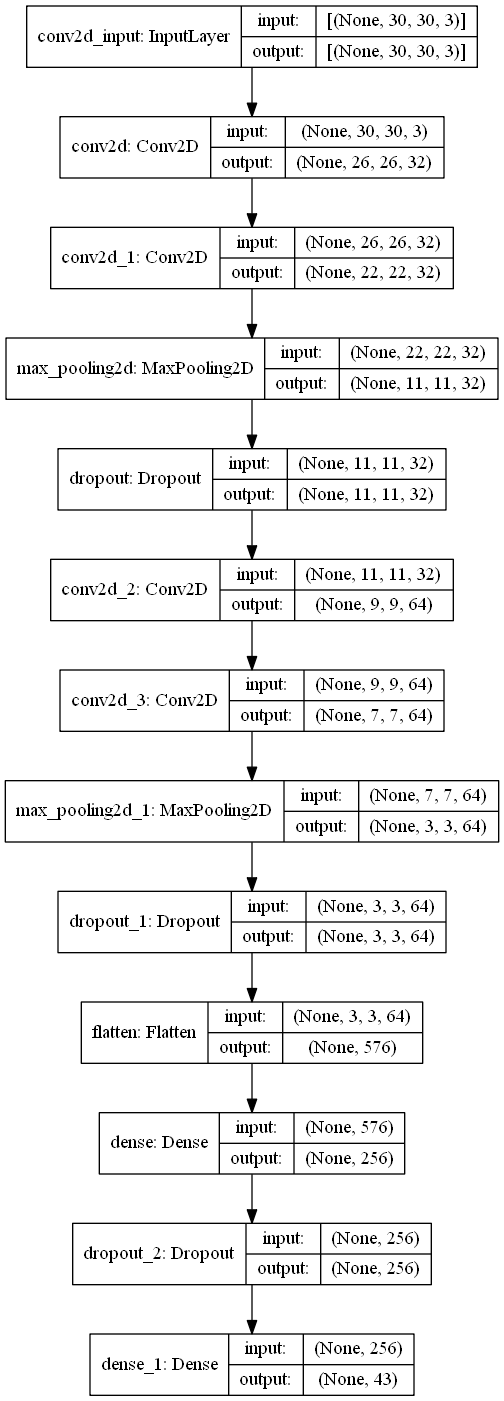

In [13]:
tf.keras.utils.plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

## Fit the data and training the model

In [14]:
my_callbacks = [
        tf.keras.callbacks.EarlyStopping(patience=2),
        tf.keras.callbacks.ModelCheckpoint(filepath='Saved_model.h5'),
        tf.keras.callbacks.TensorBoard(log_dir='./logs'),
    ]
EPOCHS = 10
# Fit model on training data
history =model.fit(x_train, y_train,batch_size=32, epochs=EPOCHS, validation_split=0.2, verbose=1, callbacks=my_callbacks)
# Save model to file
model.save("Saved_model.h5")

Epoch 1/10
600/600 [==============================] - 53s 87ms/step - loss: 3.9292 - accuracy: 0.2188 - val_loss: 0.8052 - val_accuracy: 0.7954
Epoch 2/10
600/600 [==============================] - 51s 85ms/step - loss: 1.0990 - accuracy: 0.6859 - val_loss: 0.2982 - val_accuracy: 0.9218
Epoch 3/10
600/600 [==============================] - 50s 84ms/step - loss: 0.6587 - accuracy: 0.8076 - val_loss: 0.2529 - val_accuracy: 0.9297
Epoch 4/10
600/600 [==============================] - 51s 85ms/step - loss: 0.4498 - accuracy: 0.8629 - val_loss: 0.1490 - val_accuracy: 0.9654
Epoch 5/10
600/600 [==============================] - 50s 84ms/step - loss: 0.3561 - accuracy: 0.8945 - val_loss: 0.0916 - val_accuracy: 0.9733
Epoch 6/10
600/600 [==============================] - 52s 86ms/step - loss: 0.3076 - accuracy: 0.9122 - val_loss: 0.0695 - val_accuracy: 0.9806
Epoch 7/10
600/600 [==============================] - 51s 85ms/step - loss: 0.2685 - accuracy: 0.9215 - val_loss: 0.0962 - val_accuracy:

## Evaluating the model

In [15]:
saved_model = load_model('Saved_model.h5')
_, train_acc = saved_model.evaluate(x_train, y_train, verbose=0)
_, test_acc = saved_model.evaluate(x_test, y_test, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

Train: 0.984, Test: 0.979


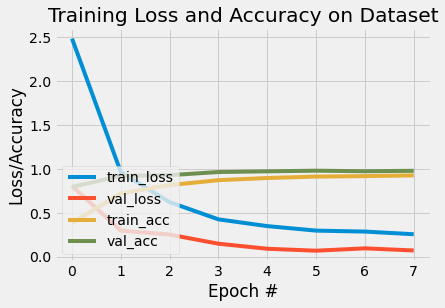

In [24]:
# plotting graphs for accuracy
plt.figure()
N = np.arange(0, EPOCHS-2)
plt.plot(N, history.history["loss"], label="train_loss")
plt.plot(N, history.history["val_loss"], label="val_loss")
plt.plot(N, history.history["accuracy"], label="train_acc")
plt.plot(N, history.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy on Dataset")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="lower left")
plt.show()

In [29]:
labels = {'Speed limit (20km/h)',
               'Speed limit (30km/h)',
               'Speed limit (50km/h)',
               'Speed limit (60km/h)',
               'Speed limit (70km/h)',
               'Speed limit (80km/h)',
               'End of speed limit (80km/h)',
               'Speed limit (100km/h)',
               'Speed limit (120km/h)',
               'No passing',
               'No passing veh over 3.5 tons',
               'Right-of-way at intersection',
               'Priority road',
               'Yield',
               'Stop',
               'No vehicles',
               'Veh > 3.5 tons prohibited',
               'No entry',
               'General caution',
               'Dangerous curve left',
               'Dangerous curve right',
               'Double curve',
               'Bumpy road',
               'Slippery road',
               'Road narrows on the right',
               'Road work',
               'Traffic signals',
               'Pedestrians',
               'Children crossing',
               'Bicycles crossing',
               'Beware of ice/snow',
               'Wild animals crossing',
               'End speed + passing limits',
               'Turn right ahead',
               'Turn left ahead',
               'Ahead only',
               'Go straight or right',
               'Go straight or left',
               'Keep right',
               'Keep left',
               'Roundabout mandatory',
               'End of no passing',
               'End no passing veh > 3.5 tons'}
x_test = np.array(x_test)
pred = model.predict_classes(x_test)
print("[INFO] evaluating network...")
predictions = model.predict(x_test, batch_size=32)
print(classification_report(y_test.argmax(axis=1),predictions.argmax(axis=1), target_names=labels))

[INFO] evaluating network...
                               precision    recall  f1-score   support

                  No vehicles       1.00      0.90      0.95        10
              General caution       0.98      0.94      0.96       136
                         Stop       0.95      0.97      0.96       159
            Children crossing       0.97      0.99      0.98       101
    Road narrows on the right       0.98      0.98      0.98       125
                   Keep right       0.94      0.99      0.96       134
   End speed + passing limits       1.00      1.00      1.00        33
         Roundabout mandatory       0.99      0.97      0.98        94
                  Pedestrians       0.98      0.98      0.98        94
              Turn left ahead       0.99      0.99      0.99       109
                     No entry       0.99      0.99      0.99       124
    Veh > 3.5 tons prohibited       0.98      0.98      0.98        91
                 Double curve       1.00      0

In [30]:
cm =confusion_matrix(np.argmax(y_test, axis=1), pred)

<AxesSubplot:>

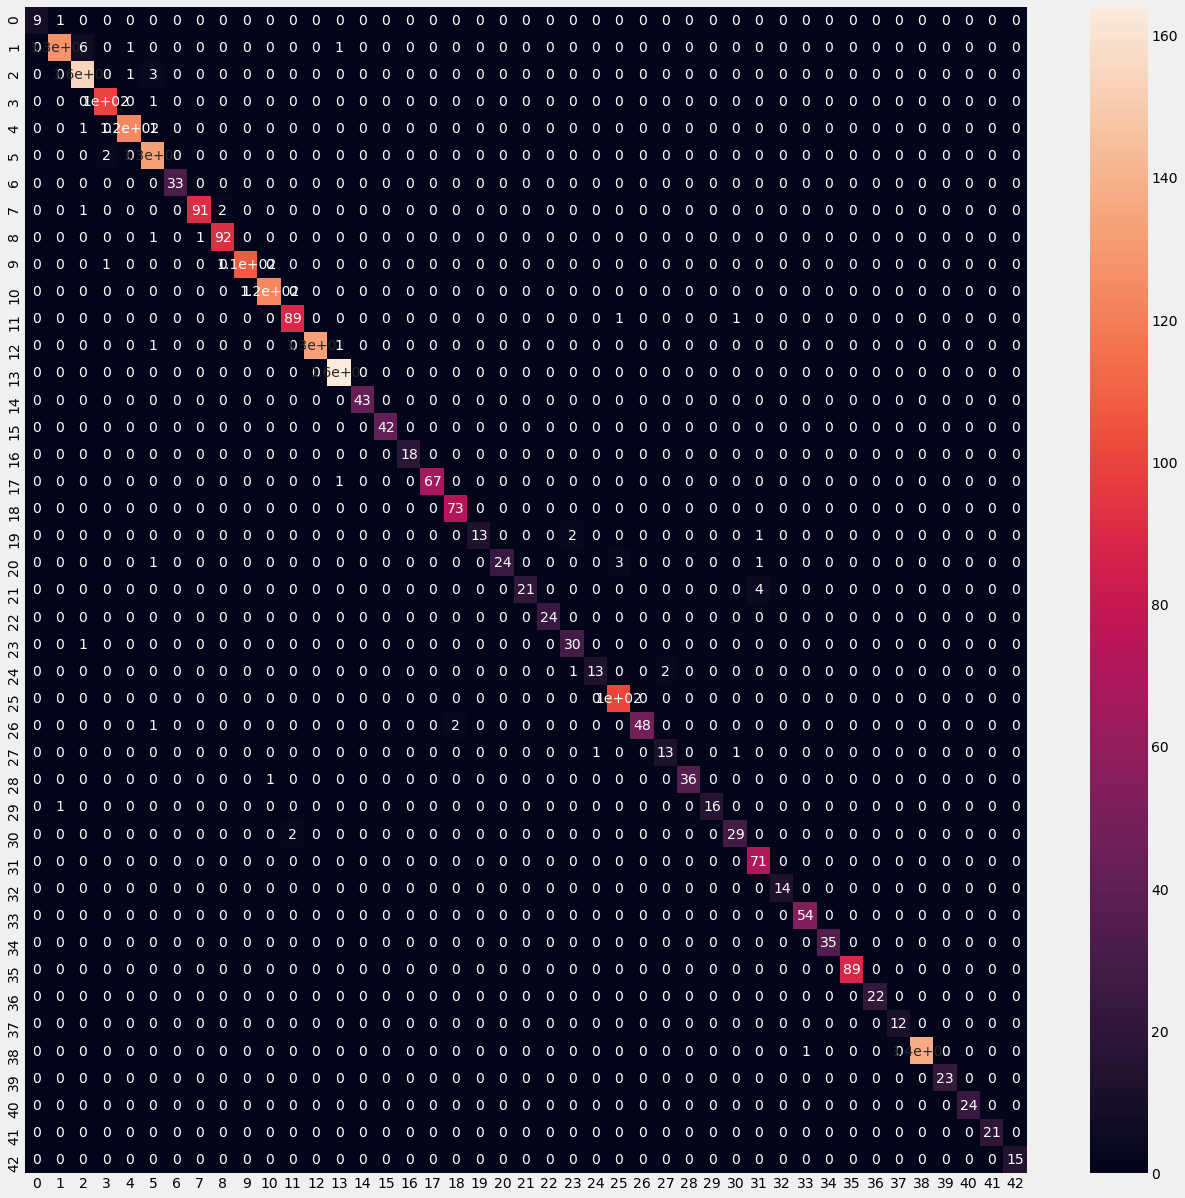

In [31]:
plt.figure(figsize = (20,20))
sns.heatmap(cm, annot=True)

## Predictions some images using GUI

In [43]:
import tkinter as tk
from tkinter import filedialog
from tkinter import *
from PIL import ImageTk, Image

# Load your model
model = load_model('Saved_model.h5') # Path to your model

# Initialise GUI
top=tk.Tk()
# Window dimensions (800x600)
top.geometry('800x600')
# Window title
top.title('Traffic sign classification')
# Window background color
top.configure(background='#CDCDCD')
# Window label
label=Label(top,background='#CDCDCD', font=('arial',15,'bold'))
# Sign image
sign_image = Label(top)


# Function to classify image
def classify(file_path):
    global label_packed
    # Open the image file path
    image = Image.open(file_path)
    # Resize the image
    image = image.resize((30,30))
    # Inserts a new axis that will appear at the axis position in the expanded array shape
    image = np.expand_dims(image, axis=0)
    # Convert to numpy array
    image = np.array(image)
    # Make prediction
    pred = model.predict_classes([image])[0]
    sign = classes[pred]
    print(sign)
    label.configure(foreground='#011638', text=sign) 
    
# Function to show the "classify" button
def show_classify_button(file_path):
    # Create the button
    classify_b=Button(top,text="Classify Image",command=lambda: classify(file_path),padx=10,pady=5)
    # Configure button colors
    classify_b.configure(background='#364156', foreground='white',font=('arial',10,'bold'))
    # Configure button place (location)
    classify_b.place(relx=0.79,rely=0.46)
    
# Function to upload image
def upload_image():
    try:
        # Path of the image
        file_path=filedialog.askopenfilename()
        # Open file path
        uploaded=Image.open(file_path)
        uploaded.thumbnail(((top.winfo_width()/2.25),(top.winfo_height()/2.25)))
        im=ImageTk.PhotoImage(uploaded)
        sign_image.configure(image=im)
        sign_image.image=im
        label.configure(text='')
        show_classify_button(file_path)
    except:
        pass
    
# Create "Upload" button
upload=Button(top,text="Upload an image",command=upload_image,padx=10,pady=5)
# "Upload" button colors and font
upload.configure(background='#364156', foreground='white',font=('arial',10,'bold'))
# Button location
upload.pack(side=BOTTOM,pady=50)
sign_image.pack(side=BOTTOM,expand=True)
label.pack(side=BOTTOM,expand=True)
# Window title text
heading = Label(top, text="Know Your Traffic Sign",pady=20, font=('arial',20,'bold'))
# Window colors
heading.configure(background='#CDCDCD',foreground='#364156')
heading.pack()
top.mainloop()

Veh > 3.5 tons prohibited
Bicycles crossing
